**Target Classification using Logistic Regression by Azimatul Matsniya** 
* **Sebagai tugas final project dari Virtual Internship Experience - Home Credit Indonesia**
* Tujuan dari analisis ini adalah mendeteksi atau mengolompokkan customer berdasarkan apakah pinjamannya bermasalah atau tidak, kemudian membuat modelnya menggunakan logistic regression. Sehingga, dari model tersebut dapat digunakan prediksi untuk klasifikasi.
* Selain itu, juga dilakukan Exploratory Data Analysis (EDA) untuk melihat karakteristik dari customer sehingga dapat membantu pengambilan keputusan untuk perusahaan
* Target : 1 (client bermasalah), 0(client tidak bermasalah)







In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Portfolio/test.csv')

In [4]:
df.shape

(307511, 122)

In [5]:
df2.shape

(48744, 121)

In [6]:
# lowercase untuk nama kolom
df.columns = df.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [7]:
# memilih beberapa feature penting yang akan dianalisi dari keseluruhan featrue yang ada
data = df[['sk_id_curr','target','name_contract_type','code_gender','flag_own_car','flag_own_realty',
           'cnt_children','amt_income_total','amt_credit','amt_goods_price','name_income_type',
           'name_education_type','name_family_status','name_housing_type','region_population_relative','days_birth','days_employed',
           'occupation_type','cnt_fam_members','region_rating_client','weekday_appr_process_start',
           'hour_appr_process_start', 'organization_type']]
data2 = df2[['sk_id_curr','name_contract_type','code_gender','flag_own_car','flag_own_realty',
           'cnt_children','amt_income_total','amt_credit','amt_goods_price','name_income_type',
           'name_education_type','name_family_status','name_housing_type','region_population_relative','days_birth','days_employed',
           'occupation_type','cnt_fam_members','region_rating_client','weekday_appr_process_start',
           'hour_appr_process_start', 'organization_type']]
data.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_goods_price,...,name_housing_type,region_population_relative,days_birth,days_employed,occupation_type,cnt_fam_members,region_rating_client,weekday_appr_process_start,hour_appr_process_start,organization_type
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,House / apartment,0.018801,-9461,-637,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,House / apartment,0.003541,-16765,-1188,Core staff,2.0,1,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,House / apartment,0.010032,-19046,-225,Laborers,1.0,2,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,House / apartment,0.008019,-19005,-3039,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,House / apartment,0.028663,-19932,-3038,Core staff,1.0,2,THURSDAY,11,Religion


In [8]:
# mengubah days_birth yang sebelumnya berupa satuan 'hari' diubah menjadi 'tahun' -> umur
data['days_birth'] = abs(round(data.iloc[:,15]/365))
data2['days_birth'] = abs(round(data2.iloc[:,14]/365))
data2['days_birth'].head()

<ipython-input-8-93192c0566f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_birth'] = abs(round(data.iloc[:,15]/365))
<ipython-input-8-93192c0566f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['days_birth'] = abs(round(data2.iloc[:,14]/365))


0    53.0
1    49.0
2    55.0
3    38.0
4    36.0
Name: days_birth, dtype: float64

In [9]:
# mengubah dari negatif menjadi positif
data['days_employed'] = abs(data.iloc[:,16])
data2['days_employed'] = abs(data2.iloc[:,15])

<ipython-input-9-7d8e3710257e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_employed'] = abs(data.iloc[:,16])
<ipython-input-9-7d8e3710257e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['days_employed'] = abs(data2.iloc[:,15])


In [10]:
# melihat data yang mengandung missing value
data.isna().sum()

sk_id_curr                        0
target                            0
name_contract_type                0
code_gender                       0
flag_own_car                      0
flag_own_realty                   0
cnt_children                      0
amt_income_total                  0
amt_credit                        0
amt_goods_price                 278
name_income_type                  0
name_education_type               0
name_family_status                0
name_housing_type                 0
region_population_relative        0
days_birth                        0
days_employed                     0
occupation_type               96391
cnt_fam_members                   2
region_rating_client              0
weekday_appr_process_start        0
hour_appr_process_start           0
organization_type                 0
dtype: int64

In [11]:
# Data jenis pendapatan mengandung missing value, dapat diisi dengan 'none' 
data['occupation_type'] = data['occupation_type'].fillna('none')

<ipython-input-11-4159b5a18900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupation_type'] = data['occupation_type'].fillna('none')


In [12]:
# Data pada kolom amt_goods_price mengandung missing value, namun tidak terlalu banyak. Akan dilakukan drop baris
data.drop(data[data.iloc[:,9].isna()].index, axis=0, inplace=True)
data.shape

<ipython-input-12-e23e1887d993>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.iloc[:,9].isna()].index, axis=0, inplace=True)


(307233, 23)

In [13]:
# Cek missing value padaa data testing
data2.isna().sum()

sk_id_curr                        0
name_contract_type                0
code_gender                       0
flag_own_car                      0
flag_own_realty                   0
cnt_children                      0
amt_income_total                  0
amt_credit                        0
amt_goods_price                   0
name_income_type                  0
name_education_type               0
name_family_status                0
name_housing_type                 0
region_population_relative        0
days_birth                        0
days_employed                     0
occupation_type               15605
cnt_fam_members                   0
region_rating_client              0
weekday_appr_process_start        0
hour_appr_process_start           0
organization_type                 0
dtype: int64

In [14]:
# Data jenis pendapatan mengandung missing value, dapat diisi dengan 'none' 
data2['occupation_type'] = data2['occupation_type'].fillna('none')

<ipython-input-14-3f7cb90ecf7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['occupation_type'] = data2['occupation_type'].fillna('none')


# **EXPLORATORY DATA ANALYSIS**

In [15]:
# Untuk model logistic regression, dipilih data-data yang hanya numerik 
train = data[['target','cnt_children','amt_income_total','amt_credit','amt_goods_price',
              'days_birth','days_employed', 'region_population_relative']]
test = data2[['cnt_children','amt_income_total','amt_credit','amt_goods_price',
              'days_birth','days_employed', 'region_population_relative']]
train.head()

,target,cnt_children,amt_income_total,amt_credit,amt_goods_price,days_birth,days_employed,region_population_relative
0,1,0,202500.0,406597.5,351000.0,26.0,637,0.018801
1,0,0,270000.0,1293502.5,1129500.0,46.0,1188,0.003541
2,0,0,67500.0,135000.0,135000.0,52.0,225,0.010032
3,0,0,135000.0,312682.5,297000.0,52.0,3039,0.008019
4,0,0,121500.0,513000.0,513000.0,55.0,3038,0.028663


In [16]:
train['target'].value_counts()

0    282429
1     24804
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

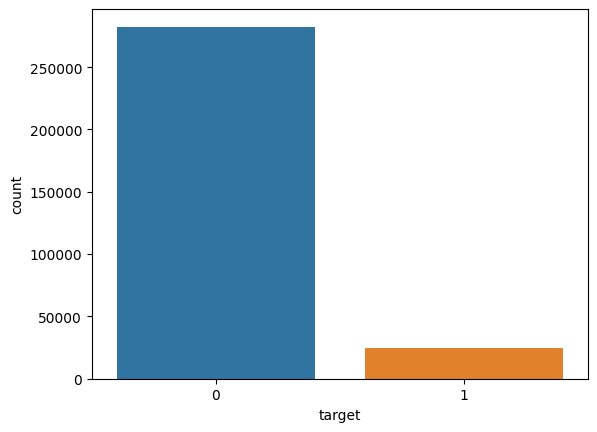

In [17]:
sns.countplot(x='target', data=train)
plt.show

In [18]:
count_acc = len(train[train['target']==0])
count_no_acc = len(train[train['target']==1])
pct_acc = (count_acc/(count_acc+count_no_acc))*100
pct_no_acc = (count_no_acc/(count_acc+count_no_acc))*100
print(f"percentage client with no troubles: {pct_acc}")
print(f"percentage client with troubles: {pct_no_acc}")

percentage client with no troubles: 91.92664850455517
percentage client with troubles: 8.073351495444825


Persentase client bermasalah cukup rendah, hanya sekitar 8% dari keseluruhan data.

In [19]:
train.groupby('target').mean()

,cnt_children,amt_income_total,amt_credit,amt_goods_price,days_birth,days_employed,region_population_relative
target,,,,,,,
0,0.412847,169111.866980,602939.985788,542736.795003,44.221401,69704.432870,0.021023
1,0.463796,165660.718614,558039.406930,488972.412554,40.778383,45594.962708,0.019133


Dapat dilihat bahwa pendapatan, total kredit dari client dengan loan yang bermasalah memiliki rata-rata yang lebih rendah. 

In [20]:
train.describe()

,target,cnt_children,amt_income_total,amt_credit,amt_goods_price,days_birth,days_employed,region_population_relative
count,307233.000000,307233.000000,3.072330e+05,3.072330e+05,3.072330e+05,307233.000000,307233.00000,307233.000000
mean,0.080734,0.416960,1.688332e+05,5.993150e+05,5.383962e+05,43.943434,67757.99060,0.020870
std,0.272426,0.722037,2.372157e+05,4.025177e+05,3.694465e+05,11.963627,139471.28471,0.013832
min,0.000000,0.000000,2.565000e+04,4.500000e+04,4.050000e+04,21.000000,0.00000,0.000290
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,34.000000,933.00000,0.010006
50%,0.000000,0.000000,1.485000e+05,5.146020e+05,4.500000e+05,43.000000,2219.00000,0.018850
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,54.000000,5710.00000,0.028663
max,1.000000,19.000000,1.170000e+08,4.050000e+06,4.050000e+06,69.000000,365243.00000,0.072508


<function matplotlib.pyplot.show(close=None, block=None)>

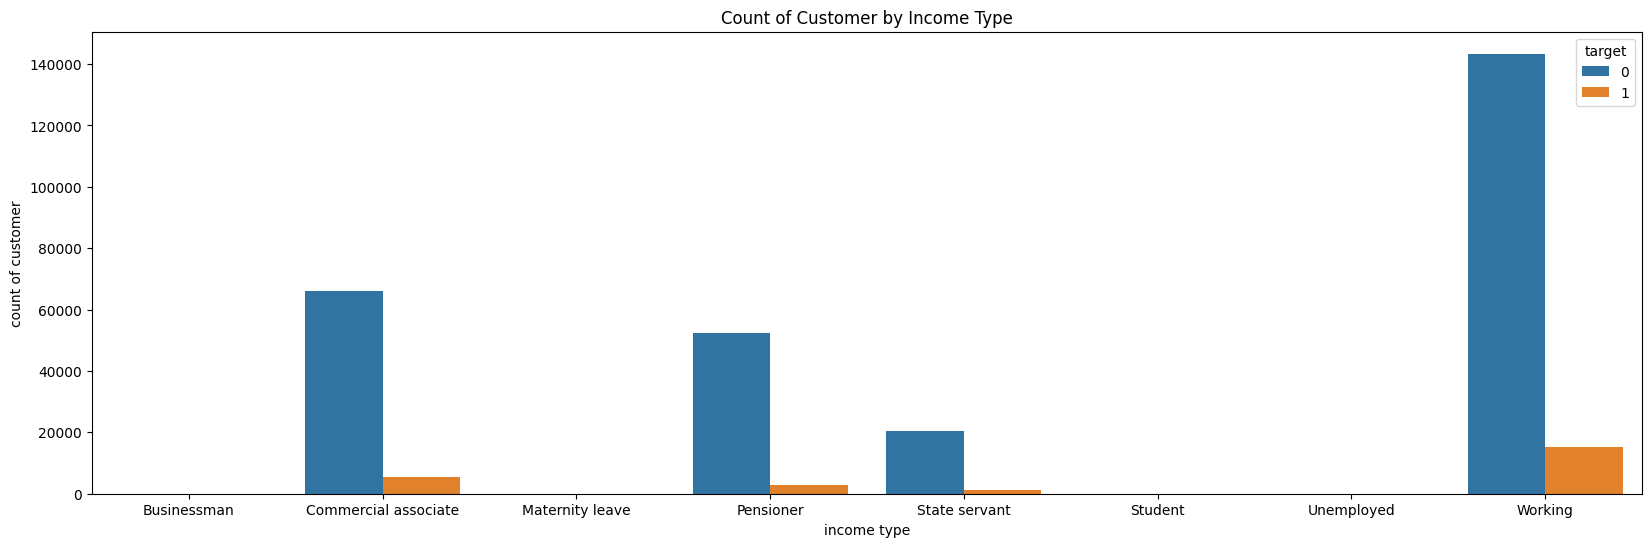

In [21]:
# Melihat karakteristik dari client berdasarkan jenis pendapatan
income = data[['target','name_income_type','sk_id_curr']].groupby(['name_income_type','target'])['sk_id_curr'].count().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='name_income_type', y='sk_id_curr', hue='target', data=income)
plt.title('Count of Customer by Income Type')
plt.xlabel('income type')
plt.ylabel('count of customer')
plt.show

Pekerja paling banyak mendapatkan persetujuan (51% ), diikuti dengan commercial associate (23%), dan Pensiunan (18%).

<function matplotlib.pyplot.show(close=None, block=None)>

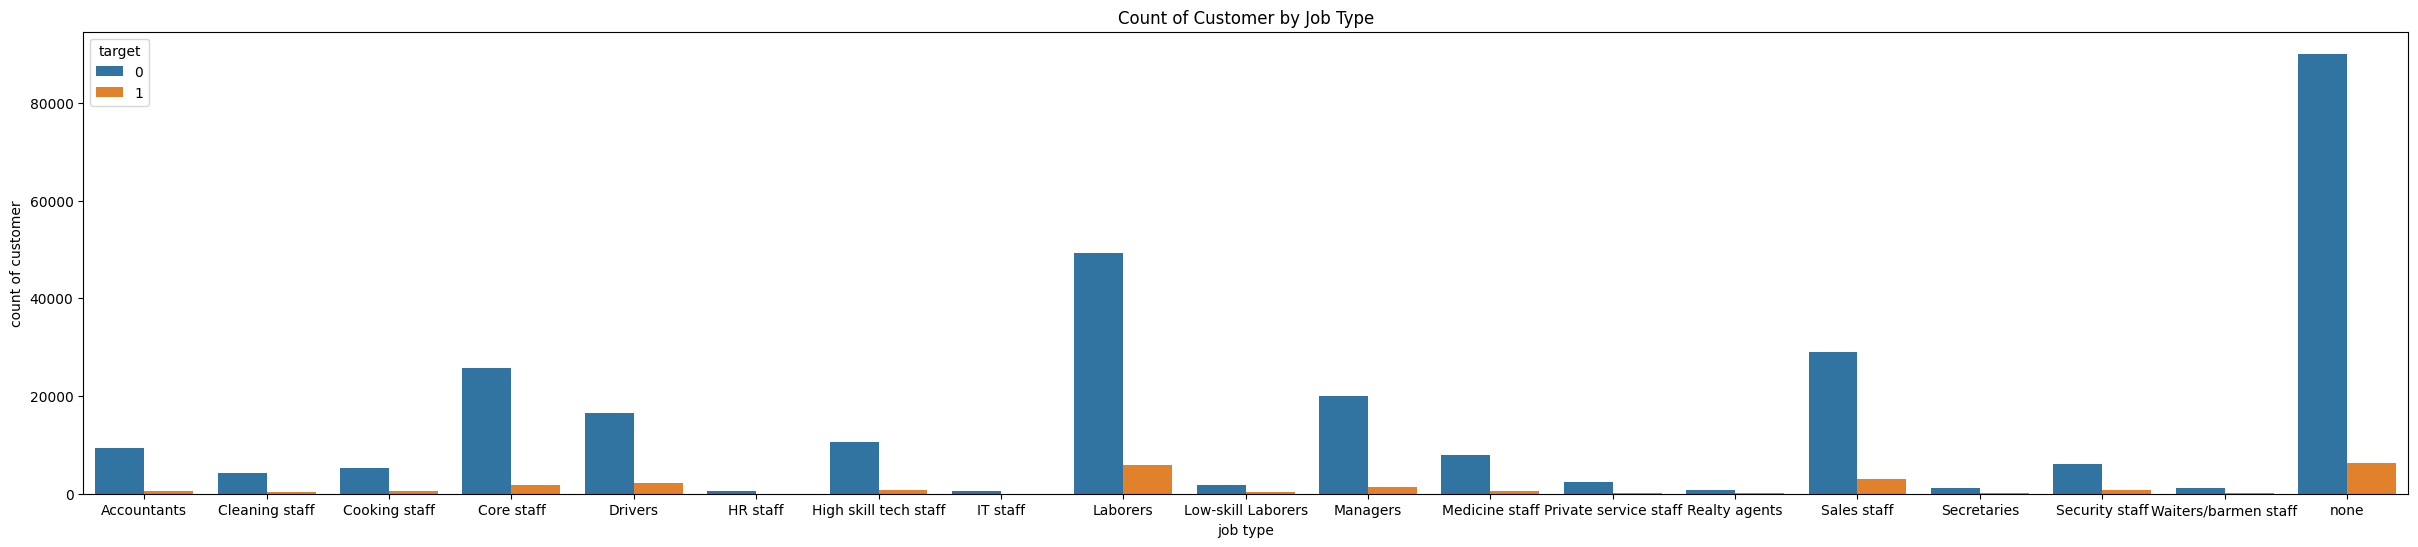

In [22]:
# Melihat karakteristik dari client berdasarkan jenis pekerjaan
job = data[['target','occupation_type','sk_id_curr']].groupby(['occupation_type','target'])['sk_id_curr'].count().reset_index()
plt.figure(figsize=(30,6))
sns.barplot(x='occupation_type', y='sk_id_curr', hue='target', data=job)
plt.title('Count of Customer by Job Type')
plt.xlabel('job type')
plt.ylabel('count of customer')
plt.show

Jenis pekerjaan yang memiliki keberhasilan diatas 90% adalah manager, staff inti, staff tech, akuntan, dan staff kesehatan. Namun, dapat dilihat persentase client pengajuan dari pekerjaan tersebut masih tergolong rendah.

In [23]:
# Melihat karakteristik dari client berdasarkan jenis organisasi mereka bekerja
data[['target','organization_type','sk_id_curr']].groupby(['organization_type','target'])['sk_id_curr'].count().reset_index()

,organization_type,target,sk_id_curr
0,Advertising,0,394
1,Advertising,1,35
2,Agriculture,0,2195
3,Agriculture,1,256
4,Bank,0,2375
...,...,...,...
111,Transport: type 4,1,501
112,University,0,1261
113,University,1,65
114,XNA,0,52364


In [24]:
data['organization_type'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

<function matplotlib.pyplot.show(close=None, block=None)>

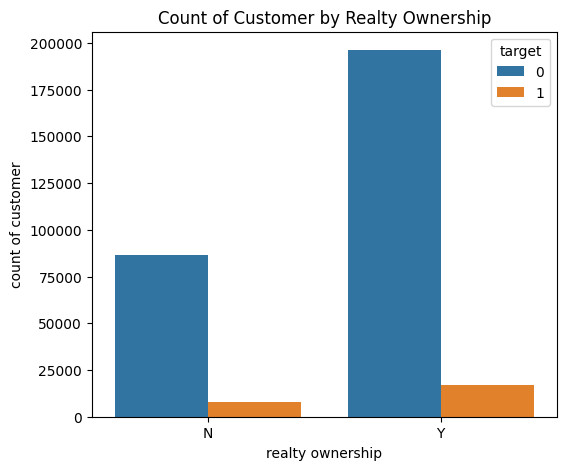

In [25]:
# Melihat karakteristik dari client berdasarkan kepemilikan property
realty = data[['target','flag_own_realty','sk_id_curr']].groupby(['flag_own_realty','target'])['sk_id_curr'].count().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(x='flag_own_realty', y='sk_id_curr', hue='target', data=realty)
plt.title('Count of Customer by Realty Ownership')
plt.xlabel('realty ownership')
plt.ylabel('count of customer')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

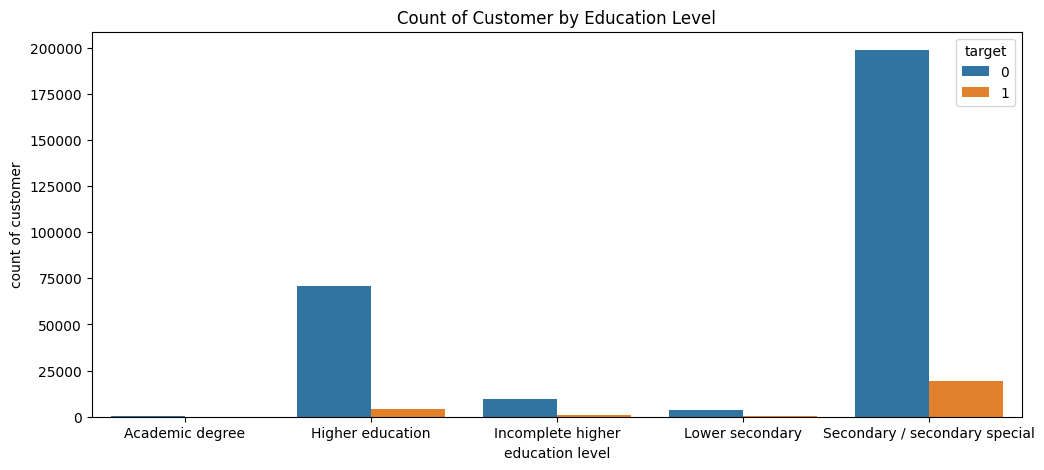

In [26]:
# Melihat karakteristik dari client berdasarkan level pendidikan
education = data[['target','name_education_type','sk_id_curr']].groupby(['name_education_type','target'])['sk_id_curr'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='name_education_type', y='sk_id_curr', hue='target', data=education)
plt.title('Count of Customer by Education Level')
plt.xlabel('education level')
plt.ylabel('count of customer')
plt.show

# **LOGISTIC REGRESSION**

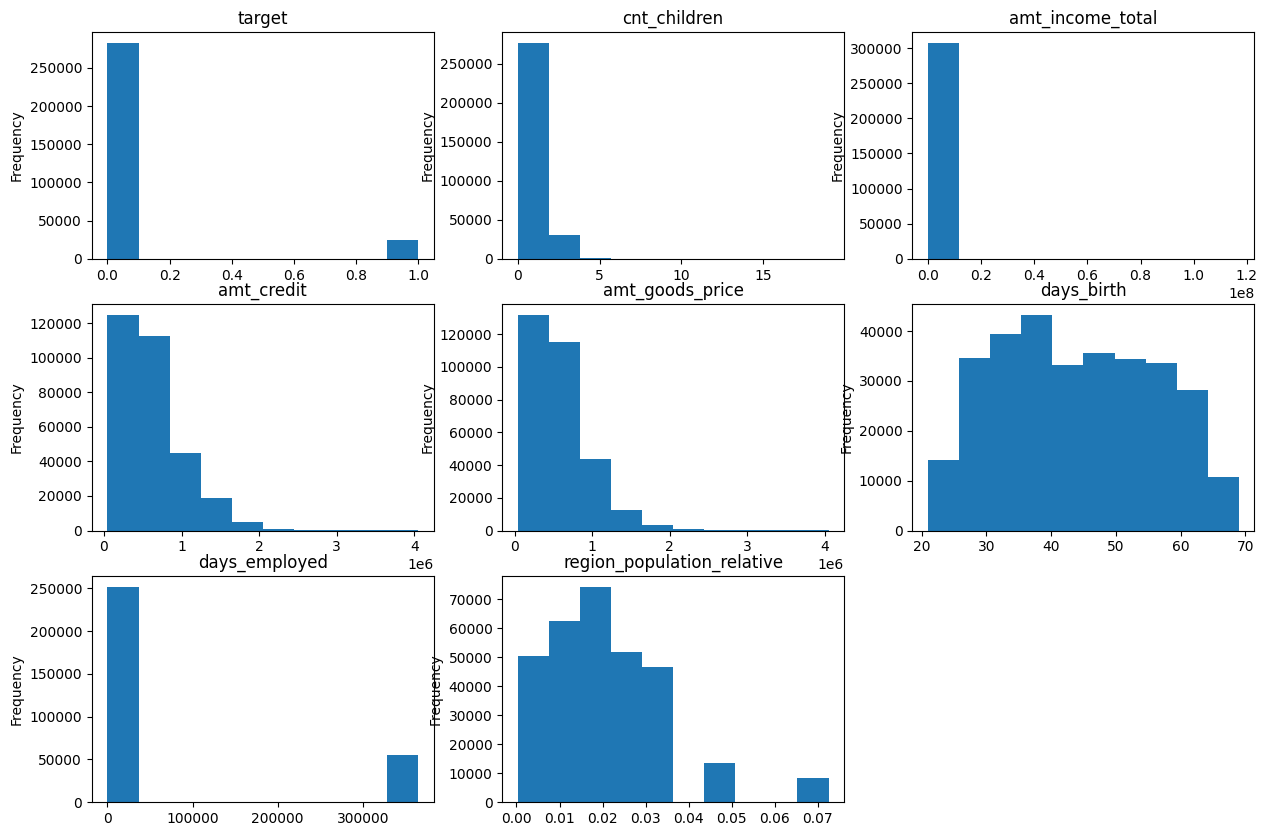

In [27]:
# Melihat distribusi dari masing-masing variabel
plt.figure(1, figsize=(15,10))
n=0
for column in train:
  n+=1
  plt.subplot(3,3,n)
  plt.title(column)
  train[column].plot(kind='hist')

<function matplotlib.pyplot.show(close=None, block=None)>

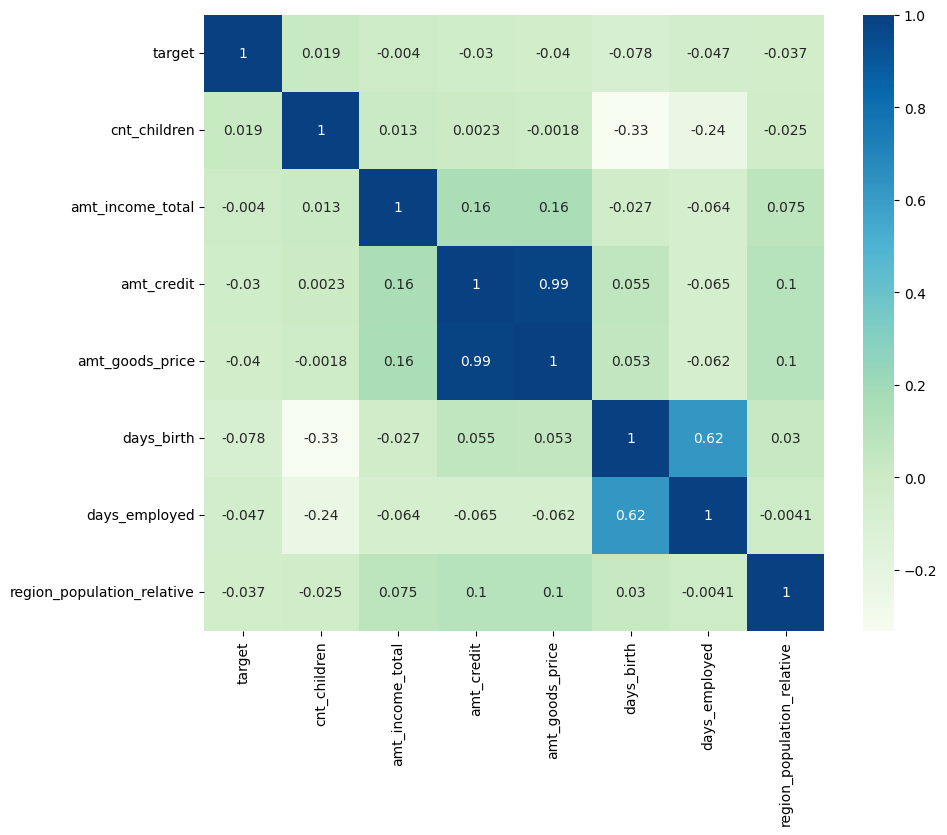

In [28]:
# Mengukur matriks korelasi untuk melihat hubungan antar variabel
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap='GnBu', annot = True)
plt.show

Target 1 (client bermasalah).
Pada matriks dapat dilihat bahwa amt_income_total, days_birth, days_employed, dll memiliki korelasi negatif. Hal ini dapat diambil kesimpulan bahwa semakin tinggi nilainya maka akan berpengaruh nilai target semakin rendah atau cenderung target (0). Hal ini berkorelasi bahwa client dengan pendapatan yang tinggi atau hari kerja yang lama cenderung merupakan client yang tidak bermasalah.

In [29]:
# split data untuk dijadikan pembuatan model (data training dan data testing)
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,1:], train['target'], test_size = 0.2, random_state = 42)

In [30]:
# model
reg = LogisticRegression(max_iter=300)
reg.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [31]:
# akurasi model
accuracy_score(y_test, reg.predict(X_test))

0.918157111006233

In [32]:
# Cek Confusion Matrix
from sklearn import metrics
y_pred = reg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[56418,     0],
       [ 5029,     0]])

<function matplotlib.pyplot.show(close=None, block=None)>

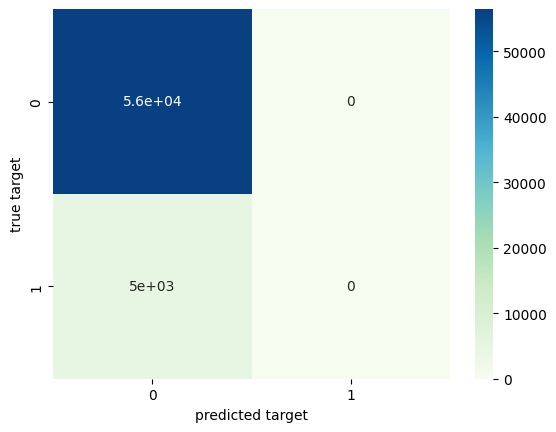

In [33]:
sns.heatmap(confusion_matrix,annot=True, cmap='GnBu')
plt.xlabel('predicted target')
plt.ylabel('true target')
plt.show

In [34]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.275908
         Iterations 7
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.014      
Dependent Variable:     target               AIC:                  135642.4563
Date:                   2023-06-02 14:00     BIC:                  135715.3419
No. Observations:       245786               Log-Likelihood:       -67814.    
Df Model:               6                    LL-Null:              -68791.    
Df Residuals:           245779               LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         7.0000                                                
------------------------------------------------------------------------------
                            Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------

In [35]:
# Prediksi untuk mendeteksi data testing (new client)
new_pred = pd.DataFrame(reg.predict(test))
new_pred.value_counts()

0    48744
dtype: int64

Keseluruhan data di application_test menunjukkan bahwa client baru rata-rata bukan merupakan client bermasalah (loan nya disetujui).